In [1270]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [1271]:
def animalDF(file):
    df = pd.read_csv(file)
    print(df.info())
    return df

# Data Exploration

Importing in the training data. Here we can see that some of the features have null values in them. Lets see how exactly how much from each column.

In [1272]:
animals = animalDF('files/train.csv')
test = animalDF('files/test.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 10 columns):
AnimalID          26729 non-null object
Name              19038 non-null object
DateTime          26729 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(10)
memory usage: 2.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11456 entries, 0 to 11455
Data columns (total 8 columns):
ID                11456 non-null int64
Name              8231 non-null object
DateTime          11456 non-null object
AnimalType        11456 non-null object
SexuponOutcome    11456 non-null object
AgeuponOutcome    11450 non-null object
Breed             11456 non-null object
Color             11456 non-null object
dtypes: int64(1), o

Here we see that we have four features that have missing values "Name", "OutcomeSubtype", "SexuponOutcome", and "AgeuponOutcome." Both "Name" and "OutcomeSubtype" are missing a significant amount of data within them while "SexuponOutcome" and "AgeuponOutcome" aren't missing that many. We'll fix these in a moment.

In [1273]:
animals.isnull().sum()
test.isnull().sum()

ID                   0
Name              3225
DateTime             0
AnimalType           0
SexuponOutcome       0
AgeuponOutcome       6
Breed                0
Color                0
dtype: int64

Lets look at the first five rows of this data set.

In [1274]:
animals.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


Above I can see several things that I want to change. I see values such as "Neutered Male" and "Spayed Female" in the "SexuponOutcome" feature. This can be separated into two different features itself, the sex of the animal and whether or not the animal is spayed, neutered, or intact. Also the feature "AgeuponOutcome" I would like to get into one catergory of age such as years, months, weeks, or days. "Breed" and "Color" are also two features that I may want to change.

In [1275]:
# Splitting SexuponOutcome feature into sex and neutered.
def sexSplit(data):
    sex = str(data)
    if 'Male' in sex:
        return 'Male'
    else:
        return 'Female'
    
def intactSplit(data):
    intact = str(data)
    if 'Neutered' in intact or 'Spayed' in intact:
        return 'Neutered'
    elif 'Intact' in intact:
        return 'Intact'
    else:
        return "Unknown"
    
animals['Sex'] = animals.SexuponOutcome.apply(sexSplit)
animals['Neutered'] = animals.SexuponOutcome.apply(intactSplit)
test['Sex'] = test.SexuponOutcome.apply(sexSplit)
test['Neutered'] = test.SexuponOutcome.apply(intactSplit)

In [1276]:
animals = animals.drop(['SexuponOutcome', 'OutcomeSubtype'], axis=1)
test = test.drop('SexuponOutcome', axis=1)

In [1277]:
def get_mix(data):
    mix = str(data)
    if 'Mix' in mix or '/' in mix:
        return 'Hybrid'
    else:
        return 'Purebred'
animals['Breed'] = animals.Breed.apply(get_mix)
test['Breed'] = test.Breed.apply(get_mix)

In [1278]:
animals['AgeuponOutcome'] = animals['AgeuponOutcome'].fillna('1 year')
test['AgeuponOutcome'] = test['AgeuponOutcome'].fillna('1 year')

In [1279]:
import re
def color(data):
    x = str(data)
    
    split = re.split('/| ', x)
    return split[0]
    
animals['Color'] = animals.Color.apply(color)
test['Color'] = test.Color.apply(color)

In [1280]:
animals.head()

,AnimalID,Name,DateTime,OutcomeType,AnimalType,AgeuponOutcome,Breed,Color,Sex,Neutered
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,Dog,1 year,Hybrid,Brown,Male,Neutered
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Cat,1 year,Hybrid,Cream,Female,Neutered
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Dog,2 years,Hybrid,Blue,Male,Neutered
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Cat,3 weeks,Hybrid,Blue,Male,Intact
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Dog,2 years,Hybrid,Tan,Male,Neutered


In [1281]:
def hasName(data):
    x = str(data)
    if 'nan' in x:
        return 'No Name'
    else:
        return 'Has Name'

animals['Name'] = animals.Name.apply(hasName)
test['Name'] = test.Name.apply(hasName)

In [1282]:
animals['Name'].value_counts()

Has Name    19021
No Name      7708
Name: Name, dtype: int64

In [1283]:
def convert_AgeuponOutcome_to_weeks(df):
    result = {}
    for k in df['AgeuponOutcome'].unique():
        if type(k) != type(""):
            result[k] = -1
        else:
            v1, v2 = k.split()
            if v2 in ["year", "years"]:
                result[k] = int(v1) * 52
            elif v2 in ["month", "months"]:
                result[k] = int(v1) * 4.5
            elif v2 in ["week", "weeks"]:
                result[k] = int(v1)
            elif v2 in ["day", "days"]:
                result[k] = int(v1) / 7
                
    df['AgeuponOutcome'] = df['AgeuponOutcome'].map(result).astype(int)
                
    return df

animals = convert_AgeuponOutcome_to_weeks(animals)
test = convert_AgeuponOutcome_to_weeks(test)

In [1284]:
def fix_date_time(df):
    def extract_field(_df, start, stop):
        return _df['DateTime'].map(lambda dt: int(dt[start:stop]))
    df['Year'] = extract_field(df,0,4)
    df['Month'] = extract_field(df,5,7)
    df['Day'] = extract_field(df,8,10)
    df['Hour'] = extract_field(df,11,13)
    df['Minute'] = extract_field(df,14,16)
    
    return df.drop(['DateTime'], axis = 1)

animals = fix_date_time(animals)
test = fix_date_time(test)

In [1285]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 14 columns):
AnimalID          26729 non-null object
Name              26729 non-null object
OutcomeType       26729 non-null object
AnimalType        26729 non-null object
AgeuponOutcome    26729 non-null int64
Breed             26729 non-null object
Color             26729 non-null object
Sex               26729 non-null object
Neutered          26729 non-null object
Year              26729 non-null int64
Month             26729 non-null int64
Day               26729 non-null int64
Hour              26729 non-null int64
Minute            26729 non-null int64
dtypes: int64(6), object(8)
memory usage: 2.9+ MB


In [1286]:
animals.head()

,AnimalID,Name,OutcomeType,AnimalType,AgeuponOutcome,Breed,Color,Sex,Neutered,Year,Month,Day,Hour,Minute
0,A671945,Has Name,Return_to_owner,Dog,52,Hybrid,Brown,Male,Neutered,2014,2,12,18,22
1,A656520,Has Name,Euthanasia,Cat,52,Hybrid,Cream,Female,Neutered,2013,10,13,12,44
2,A686464,Has Name,Adoption,Dog,104,Hybrid,Blue,Male,Neutered,2015,1,31,12,28
3,A683430,No Name,Transfer,Cat,3,Hybrid,Blue,Male,Intact,2014,7,11,19,9
4,A667013,No Name,Transfer,Dog,104,Hybrid,Tan,Male,Neutered,2013,11,15,12,52


In [1287]:
test.head()

,ID,Name,AnimalType,AgeuponOutcome,Breed,Color,Sex,Neutered,Year,Month,Day,Hour,Minute
0,1,Has Name,Dog,45,Hybrid,Red,Female,Intact,2015,10,12,12,15
1,2,Has Name,Dog,104,Hybrid,Black,Female,Neutered,2014,7,26,17,59
2,3,Has Name,Cat,52,Hybrid,Brown,Male,Neutered,2016,1,13,12,20
3,4,Has Name,Dog,18,Hybrid,Tricolor,Male,Intact,2013,12,28,18,12
4,5,Has Name,Dog,104,Hybrid,White,Male,Neutered,2015,9,24,17,59


In [1288]:
animals.to_csv('files/cleanTrain.csv', index=False)
test.to_csv('files/cleanTest.csv', index=False)

# Exploratory Visualization

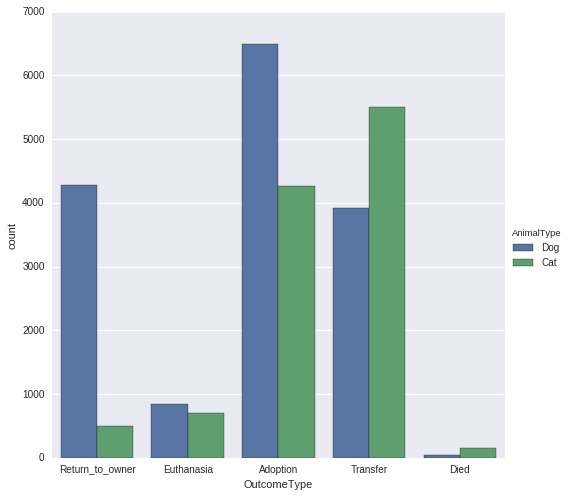

In [1289]:
sns.factorplot(data=animals, x='OutcomeType', hue='AnimalType', kind='count', size=7)

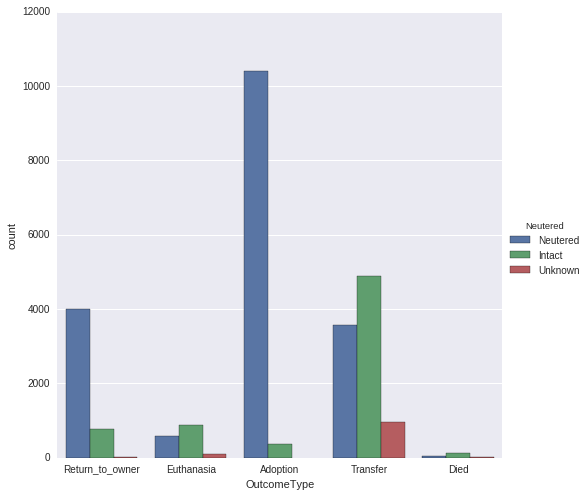

In [1290]:
sns.factorplot(data=animals, x='OutcomeType', hue='Neutered', kind='count', size=7)

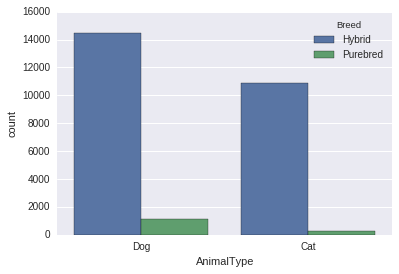

In [1291]:
sns.countplot(data=animals, x='AnimalType',hue='Breed')